In [37]:
import os 
import math
import scipy
import librosa
from librosa import load, display
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from tones import SINE_WAVE
from tones.mixer import Mixer 

from tqdm import tqdm
from scipy.io import wavfile
from scipy import signal as signal
from skimage.measure import block_reduce

import plot as pl 
import settings as sett
from functions.Sample import Sound

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] 

72.0

In [11]:
tonotopic_maps = np.load(os.path.join('../Data/INT_Sebmice_alignedtohorizon.npy'))

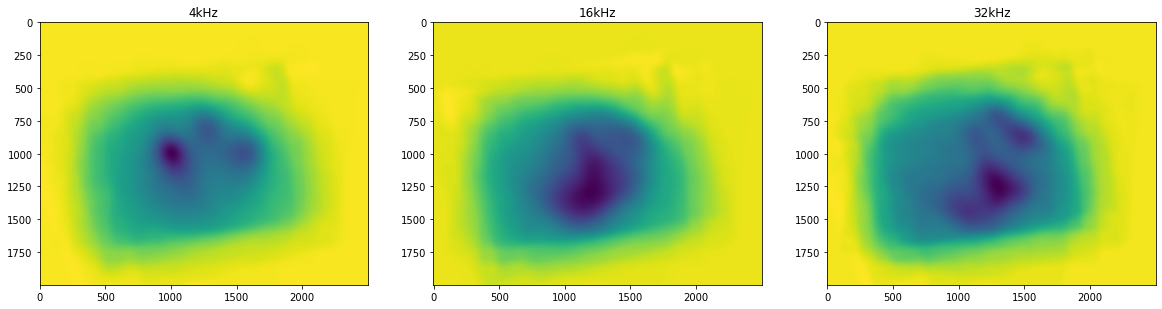

In [24]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(tonotopic_maps[1])
axs[1].imshow(tonotopic_maps[2])
axs[2].imshow(tonotopic_maps[3])

axs[0].set_title('4kHz')
axs[1].set_title('16kHz')
axs[2].set_title('32kHz')

plt.show()

(999, 1003)


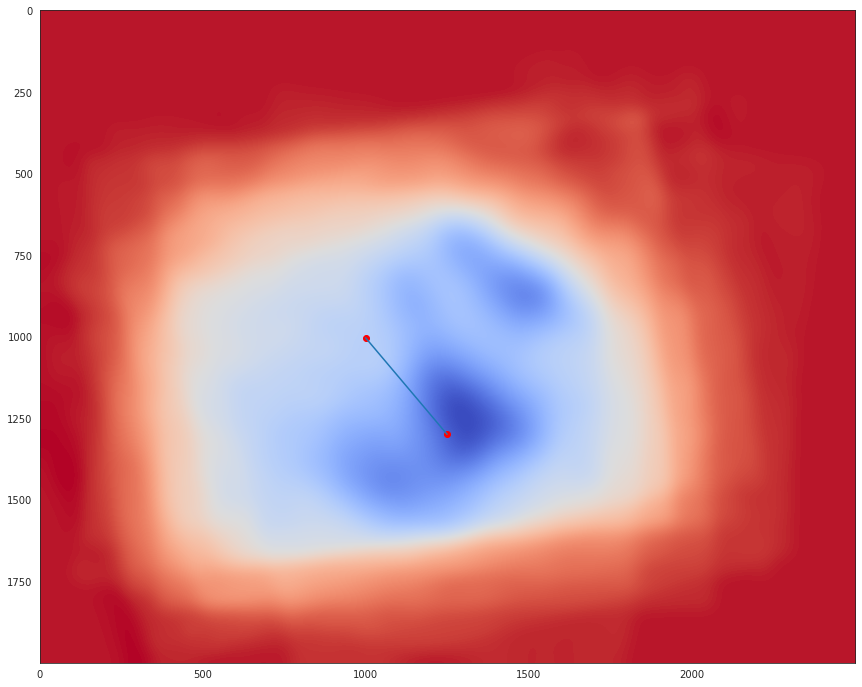

In [88]:
tmap4 = tonotopic_maps[1]
tmap32 = tonotopic_maps[3]

# Normalize tmaps
tmap4 = (tmap4 - np.min(tmap4)) / (np.max(tmap4) - np.min(tmap4))
tmap32 = (tmap32 - np.min(tmap32)) / (np.max(tmap32) - np.min(tmap32))

min4 = np.unravel_index(tmap4.argmin(), tmap4.shape)
min32 = np.unravel_index(tmap32.argmin(), tmap32.shape)

print(min4)


# 4kHz is negative, 32 positive

weighted_tmap = (tmap4 + tmap32) / 2.0


plt.imshow(tmap32, cmap='coolwarm')
plt.scatter(min4[0], min4[1], marker='o', c='red')
plt.scatter(min32[0], min32[1], marker='o', c='red')
plt.plot([min4[0], min32[0]], [min4[1], min32[1]])

plt.show()

In [89]:
# Get distance between two minimum
distance_min = math.sqrt((min4[0] - min32[0])**2 + (min4[1] - min32[1])**2)

#

387.44806103528254
